# Recurrent Neural Network

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 1226):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
X_train.dtype

dtype('float64')

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
rnn_model = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
rnn_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
rnn_model.add(LSTM(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
rnn_model.add(LSTM(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [12]:
rnn_model.add(LSTM(units = 50))
rnn_model.add(Dropout(0.2))

### Adding the output layer

In [13]:
rnn_model.add(Dense(units = 1))

### Compiling the RNN

In [14]:
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
rnn_model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 11s 112ms/step - loss: 0.0292
Epoch 2/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0058
Epoch 3/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0055
Epoch 4/100
37/37 [==============================] - 4s 111ms/step - loss: 0.0056
Epoch 5/100
37/37 [==============================] - 4s 111ms/step - loss: 0.0044
Epoch 6/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0051
Epoch 7/100
37/37 [==============================] - 4s 111ms/step - loss: 0.0046
Epoch 8/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0048
Epoch 9/100
37/37 [==============================] - 4s 111ms/step - loss: 0.0045
Epoch 10/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0044
Epoch 11/100
37/37 [==============================] - 4s 112ms/step - loss: 0.0039
Epoch 12/100
37/37 [==============================] - 4s 111ms/step - loss: 0.0039
Epoch 13/100

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('/content/Uniqlo(FastRetailing) 2017 Test - stocks2017.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [58]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 68):
    X_test.append(inputs[i-60:i, 0])
    
#print(len(X_test), len(X_test[8]))
X_test = np.array(X_test)
#X_test = np.array(X_test, dtype='float64')

print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(67,)
(8, 60)


### Visualising the results

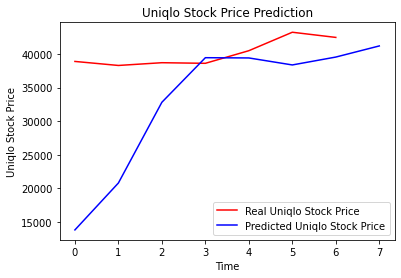

In [59]:
plt.plot(real_stock_price, color = 'red', label = 'Real Uniqlo Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Uniqlo Stock Price')
plt.title('Uniqlo Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Uniqlo Stock Price')
plt.legend()
plt.show()